# Imports

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from os import listdir, path
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
obv_dataset_dir = 'obv_images/'
rev_dataset_dir = 'rev_images/'

obv_folders = [folder for folder in listdir(obv_dataset_dir) if path.isdir('%s/%s' % (obv_dataset_dir, folder))]
rev_folders = [folder for folder in listdir(rev_dataset_dir) if path.isdir('%s/%s' % (rev_dataset_dir, folder))]

X_obv, X_rev = [], []
for folder in obv_folders:
  for img in listdir('%s/%s' % (obv_dataset_dir, folder)):
    X_obv.append(np.asarray(Image.open('%s/%s/%s' % (obv_dataset_dir, folder, img)).convert('L')).flatten())
for folder in rev_folders:
  for img in listdir('%s/%s' % (rev_dataset_dir, folder)):
    X_rev.append(np.asarray(Image.open('%s/%s/%s' % (rev_dataset_dir, folder, img)).convert('L')).flatten())

X_all = np.concatenate((X_obv, X_rev))
mean = np.mean(X_all, axis=0)
X_all_mean = X_all - np.mean(X_all, axis=0)
X_obv_mean = X_obv - np.mean(X_obv, axis=0)
X_rev_mean = X_rev - np.mean(X_rev, axis=0)

In [3]:
X = X_obv
X_mean = X_obv_mean

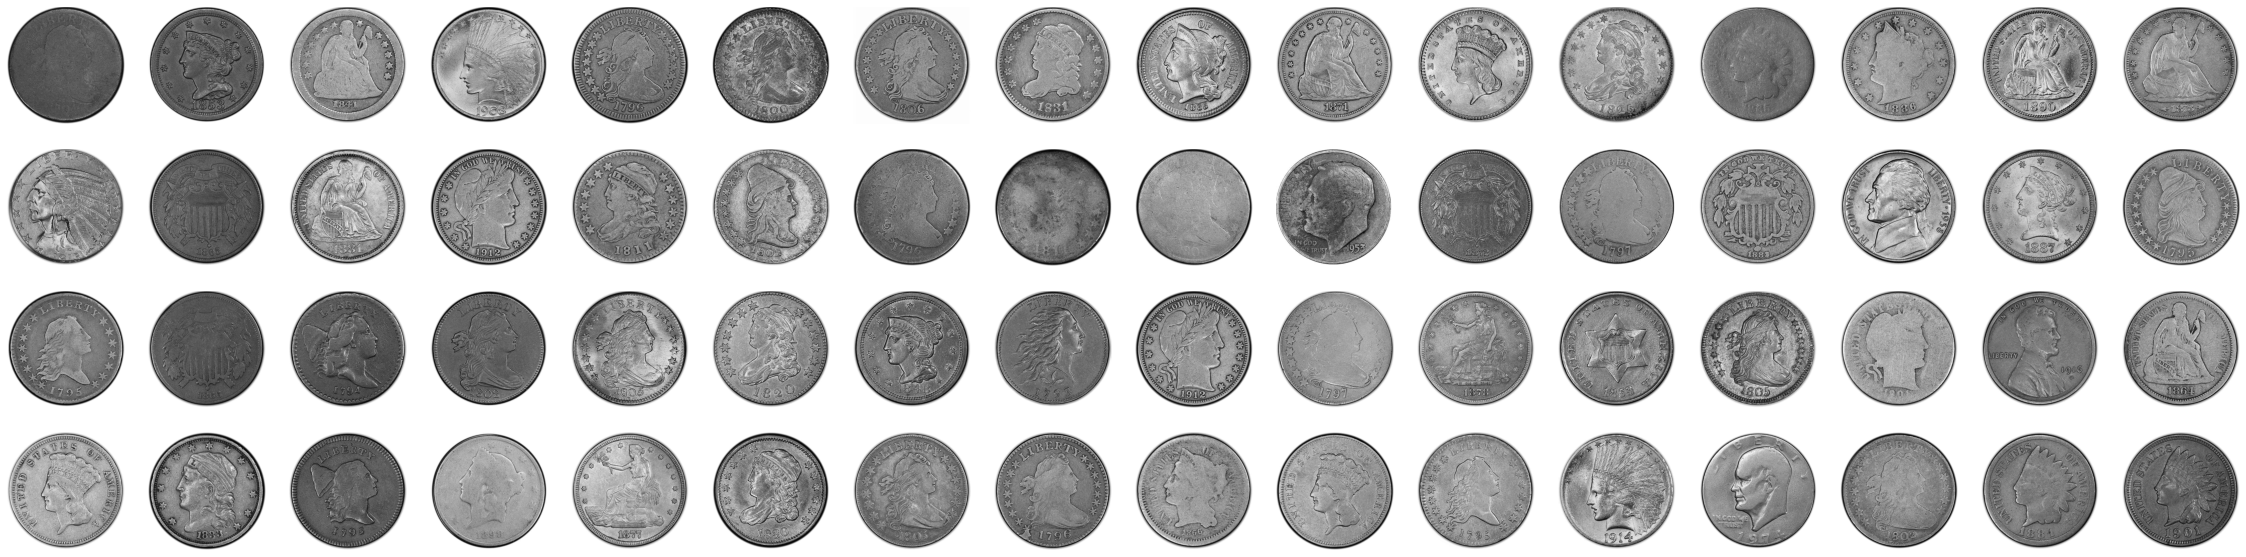

In [6]:
fig = plt.figure(figsize=(40, 10))
i = 1
for rand_index in np.random.randint(0, len(X), size=64):
  fig.add_subplot(4, 16, i)
  plt.axis('off')
  plt.imshow(np.reshape(X[rand_index], (500, 500)), cmap='gray')
  i += 1

In [27]:
pca = PCA(n_components=250)
pca.fit(X_mean)

PCA(n_components=250)

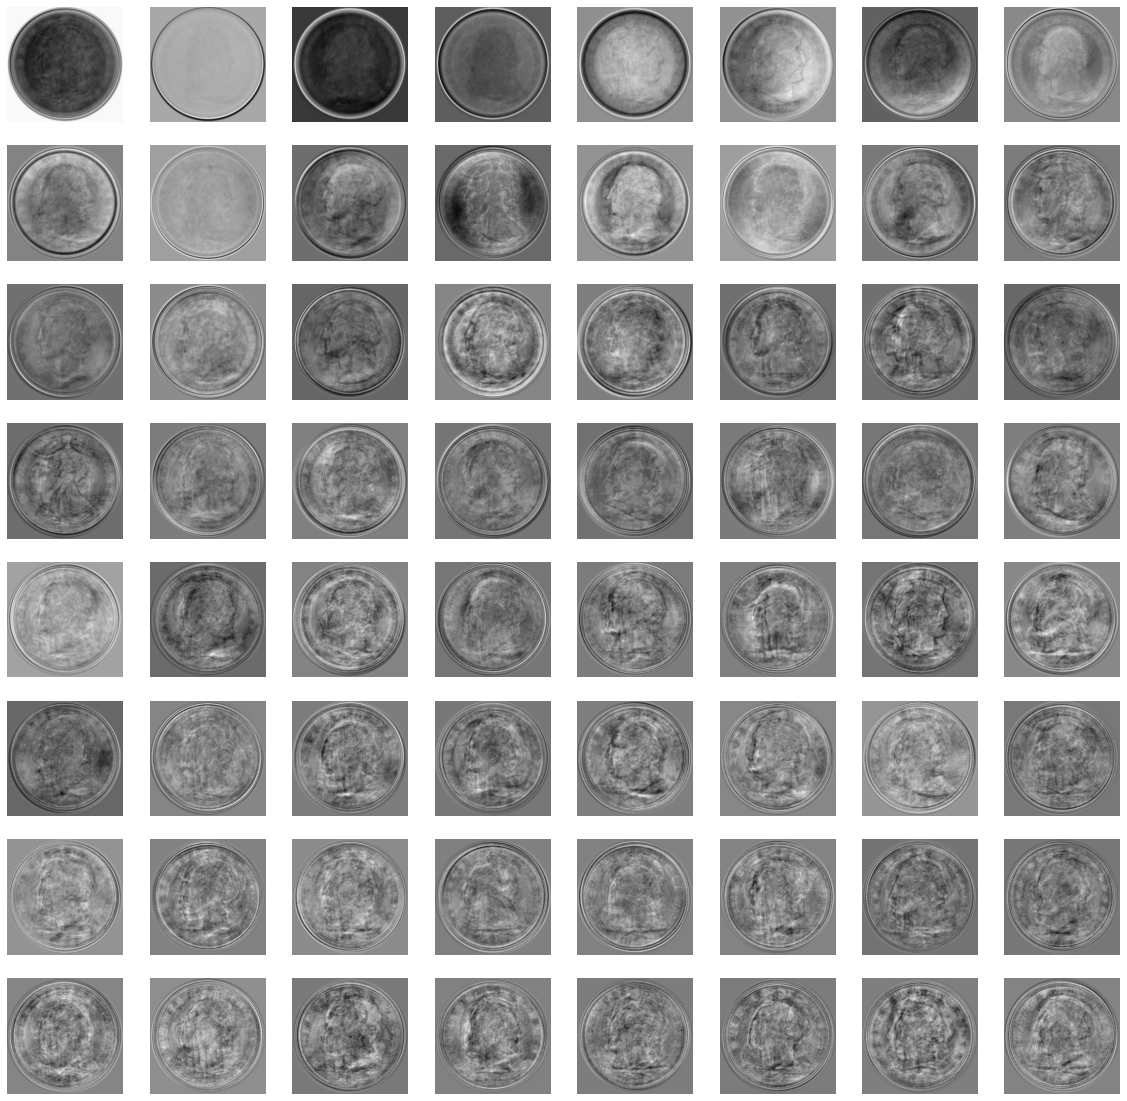

In [28]:
eigencoins = pca.components_.reshape((250, 500, 500))
fig = plt.figure(figsize=(20, 20))
i = 1
for eigencoin in eigencoins[:64]:
  fig.add_subplot(8, 8, i)
  plt.axis('off')
  plt.imshow(eigencoin, cmap='gray')
  i += 1

In [29]:
X_new = pca.inverse_transform(pca.transform(X))

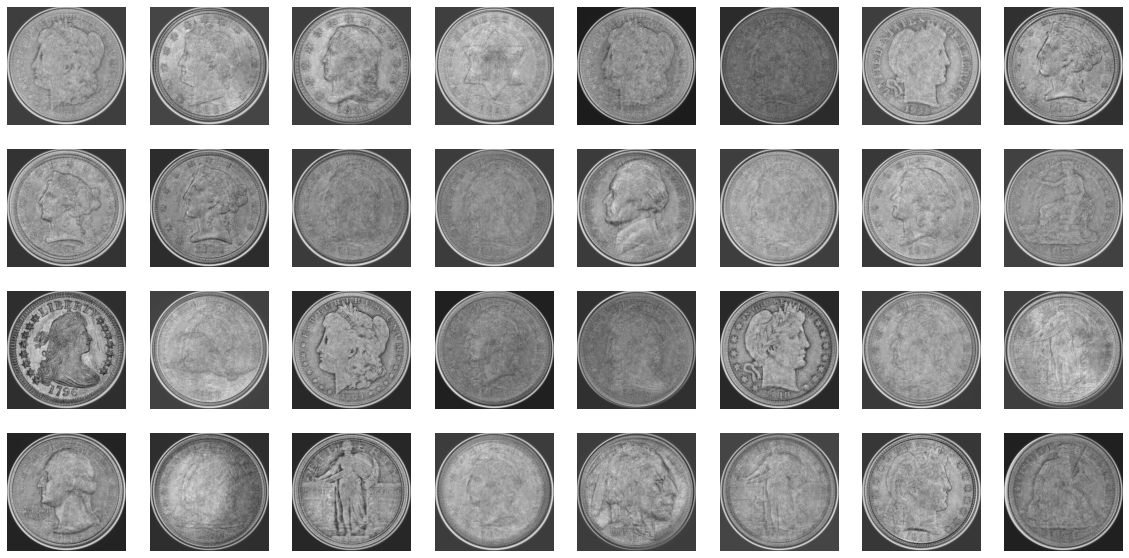

In [30]:
fig = plt.figure(figsize=(20, 10))
i = 1
for rand_index in np.random.randint(0, len(X_new), size=32):
  fig.add_subplot(4, 8, i)
  plt.axis('off')
  plt.imshow(np.reshape(X_new[rand_index], (500, 500)), cmap='gray')
  i += 1